# New York Airbnb EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

# DÍA 1

## Paso 1: Planteamiento del problema

> '¿Cuánto costará el alojamiento en función del tipo de alojamiento y la ubicación?'

## Paso 2: Recopilación de datos

In [3]:
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Obtain dimensions
df.shape

(48895, 16)

In [5]:
# Obtain information about tada types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Display descriptive statistics for each column of the DataFrame, transposed (T) for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [7]:
df['availability_365'].value_counts()

availability_365
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: count, Length: 366, dtype: int64

> ### Observaciones:
>
> - Existen un total de 48895 filas (en este caso, alojamientos) y 16 columnas
> - Las variables `Last_review` y `Reviews_per_month` tienen 38843 instancias con valores, por lo que contendría más de 1000 valores nulos.
> - Las variables `Name` y `Host_name` también cuentan con valores nulos, pero en un número mucho más reducido que las anteriores.
> - El resto de variables cuentan siempre con valor.
> - Los datos cuentan con 10 características numéricas y 6 características categóricas.

## Paso 3: Limpieza de Datos

### Limpieza de datos: Eliminar duplicados

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [9]:
# To find complete duplicate rows
df.drop('id', axis=1).duplicated().sum()

np.int64(0)

In [10]:
# To detect duplicate values in a single column
df['name'].duplicated().sum()

np.int64(989)

In [11]:
df['host_id'].duplicated().sum()

np.int64(11438)

>  ### Observaciones
>
> No encontramos ninguna fila duplicada. Por otro lado, si revisamos algunos datos de cada columna, en este caso, de columna `name` y columna `host_id` podemos ver que hay datos duplicados, pero es normal porque un anfitrión puede tener varios alojamientos publicados y los nombres de los alojamientos suelen ser muy parecidos en Airbnb y algunos pueden ser iguales. 

### Limpieza de datos: Eliminar información irrelevante

En función del objetivo planteado hay varios datos que no son relevantes para el análisis. 

> ### Conclusión:
>
> Los variables como id, nombre del alojamiento, id del anfitrión y su nombre son datos sencillos que realmente no afecta mi analisis y no tiene relación con mi target - precio. Las variables de último comentario y comentarios por mes tienen muchas valones null y tampoco afectará mi analisis sobre el precio. 
> Definimos que las variables que el algoritmo no utilizará en el proceso predictivo son:
 >
 > `Id`, `Name`, `Host_Id` , `Host_Name`, `Last_review` y `Reviews_per_month`.

In [12]:
df.drop(['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


## Paso 4: Análisis de Variables

#### Añálisis de Variable Univariante Categóricas

En este caso, las variables categóricas son: `Neighbourhood_group`, `Room_type`, `Neighbourhood` y `Availability_365`.

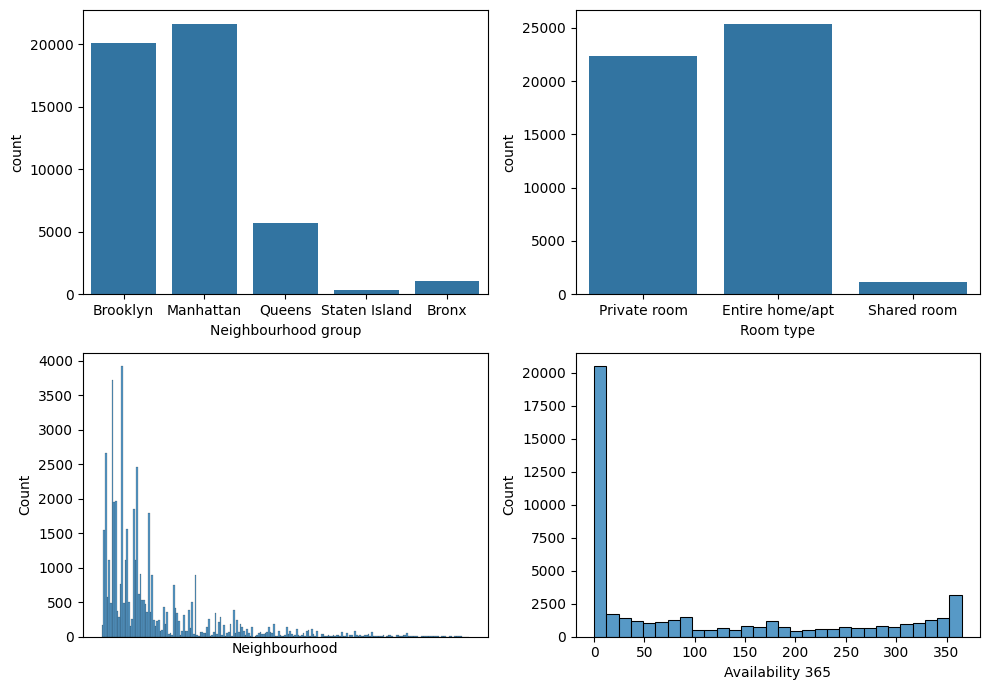

In [13]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.countplot(ax=axis[0,0], data=df, x='neighbourhood_group')
axis[0,0].set_xlabel('Neighbourhood group')
sns.countplot(ax=axis[0,1], data=df, x='room_type')
axis[0,1].set_xlabel('Room type')
sns.histplot(ax=axis[1,0], data=df, x='neighbourhood').set_xticks([])
axis[1,0].set_xlabel('Neighbourhood')
sns.histplot(ax=axis[1,1], data=df, x='availability_365').set(xlabel=None)
axis[1,1].set_xlabel('Availability 365')

plt.tight_layout()
plt.show()

> #### Observaciones 
>
> - **Neighbourhood group**: La mayoria de los alojamientos se encuentra en Brooklyn y Manhattan. 
> - **Room type**: Más de 25000 alojamientos son apartamentos o casas enteros y hay muy pocos alojamientos con las habitaciones compartidas.
> - **Neighbourhood**: Podemos ver que la variable presenta una alta cantidad de categorías (barrios), donde la mayoría de los barrios tienen pocos listados, mientras que unos pocos concentran la mayor parte de las propiedades disponibles. 
> - **Availability 365**: Hay muchos alojamientos con la disponibilidad nula, puede ser un error y tienen al calendario cerrado por varios razones, por otro lado más de 3000 alojamientos tiene la disponibilidad todo el año. 

#### Análisis de Variables Univariante Numéricas 

En este caso son: `Price`, `Minimum_nights`, `Number_of_reviews` , `Latitude` , `Longitude`.

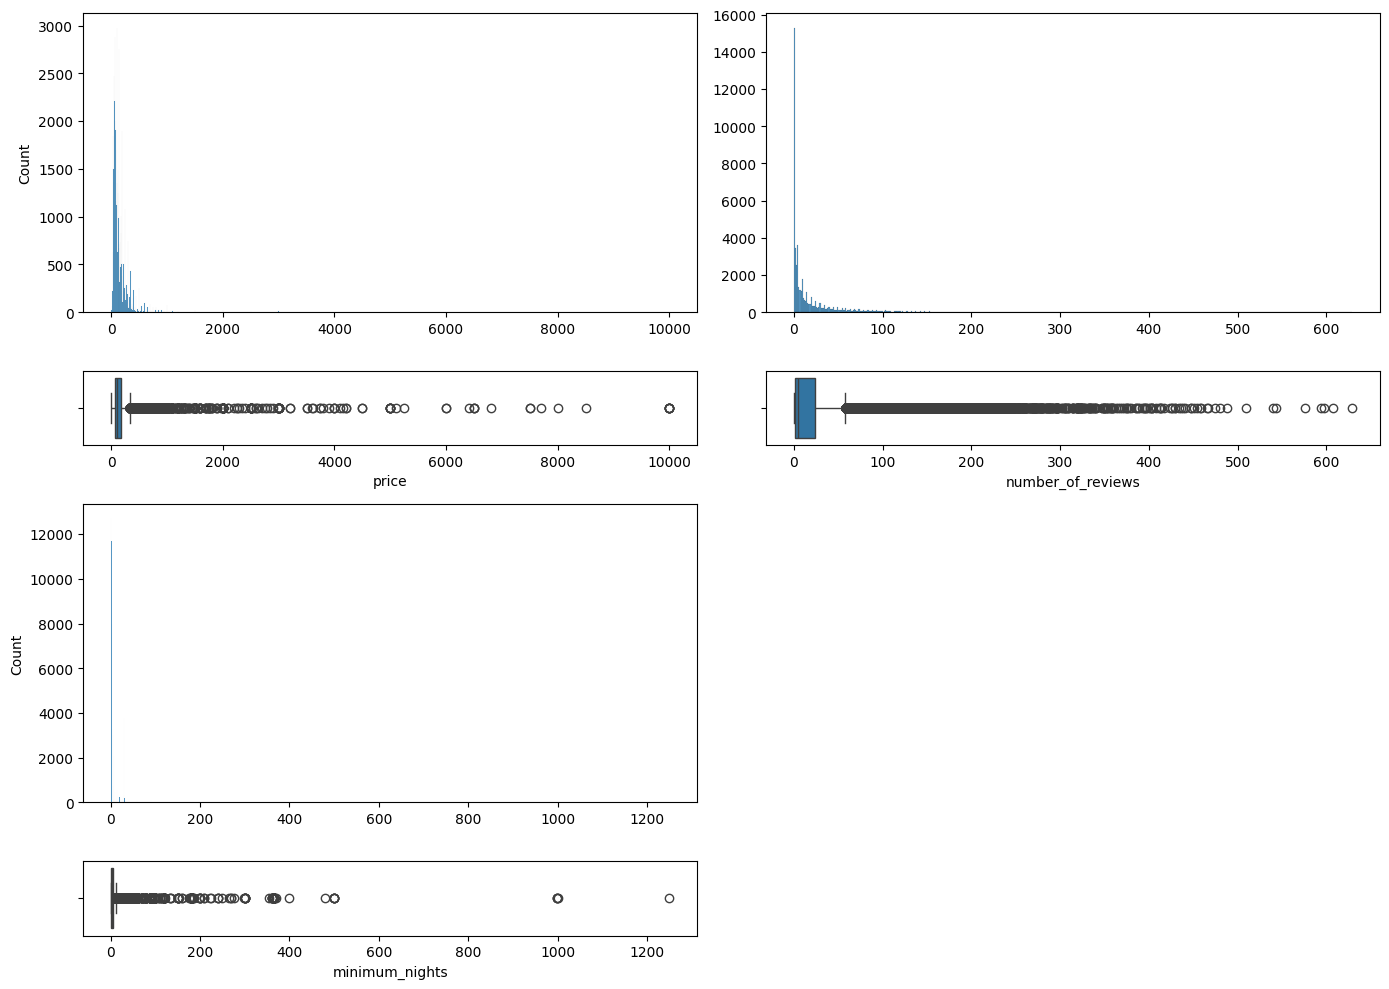

In [14]:
fig, axis = plt.subplots(4, 2, figsize=(14, 10), gridspec_kw={'height_ratios': [4, 1, 4, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax=axis[0, 0], data=df, x='price').set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x='price')
sns.histplot(ax=axis[0, 1], data=df, x='number_of_reviews').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x='number_of_reviews')
sns.histplot(ax=axis[2, 0], data=df, x='minimum_nights').set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x='minimum_nights')

# Remove an axis (subplot) from the figure
fig.delaxes(axis[2,1])
fig.delaxes(axis[3,1])

# Adjust the layout
plt.tight_layout()
plt.show()

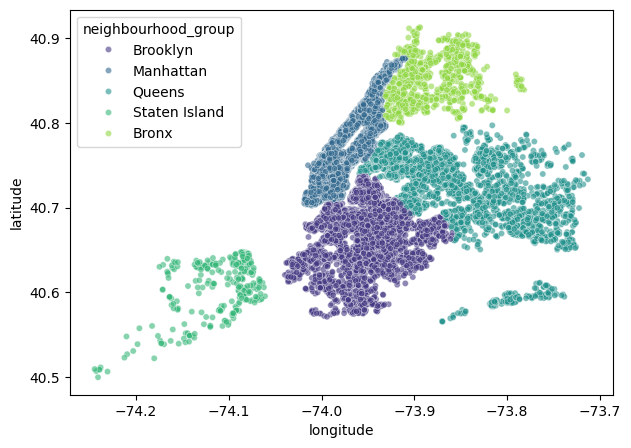

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='viridis', alpha=0.6, s=20)
plt.show()

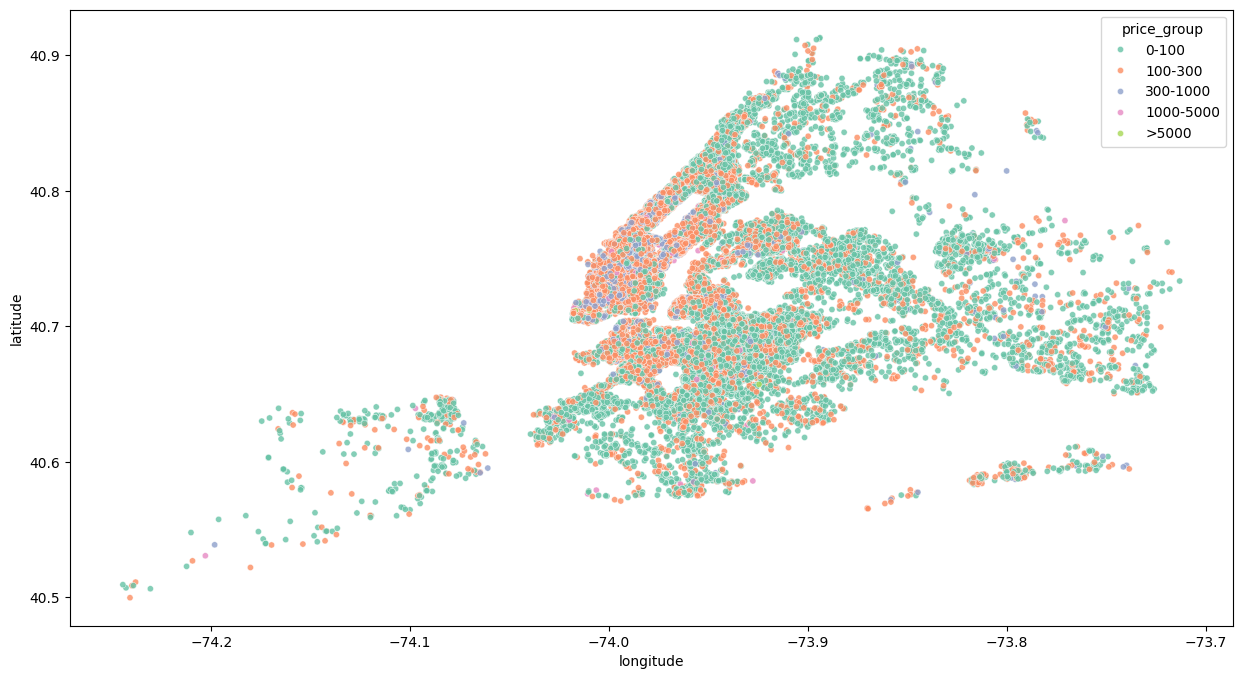

In [31]:
bins = [0, 100, 300, 1000, 5000, df['price'].max()]
labels = ['0-100', '100-300', '300-1000', '1000-5000', '>5000']
df['price_group'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price_group', palette='Set2', alpha=0.8, s=20)
plt.show()



> #### Observaciones:
>
> - **Price**: La mayoría de los precios son bajos, entre 0 y 300, hay una concentración muy alta de valores cerca de 0. 
> - **Number of reviews**: Existen muchos alojamientos cuales todavía no tienen ningun comentario. 
> - **Minimum nights**: Gran mayoría de los valores son bajos, por lo cual podemos decir que la mayoría de los alojamientos tiene una estancia minima establecida de menos de 5 noches. 
> - **Longitud y latitude**: Se distingen claramente las diferentes zonas y del segundo gráfico podemos confirmar que la mayoría de precios son hasta 100. El rango de 100 hasta 300 se concentra en la ciudad de Manhattan. 

#### Análisis de variable multivariante

#### Análisis numérico-numérico

##### Price - (Number of reviews, Minimum nights)

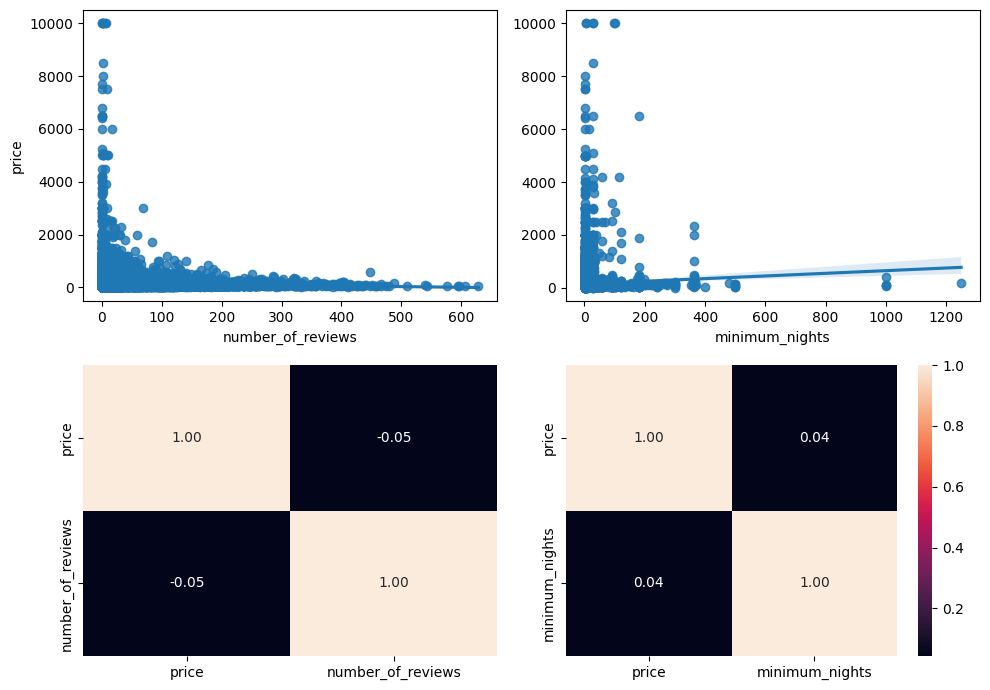

In [17]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create a multiple scatter diagram
sns.regplot(ax=axis[0, 0], data=df, x='number_of_reviews', y='price')
sns.heatmap(df[['price', 'number_of_reviews']].corr(), annot=True, fmt='.2f', ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=df, x='minimum_nights', y='price').set(ylabel=None)
sns.heatmap(df[['price', 'minimum_nights']].corr(), annot=True, fmt='.2f', ax=axis[1, 1])

# Adjust the layout
plt.tight_layout()
plt.show()

> ##### Observaciones

> - Existe una relación ligeramente negativa (aunque muy débil) entre el precio del alojamiento y el número de reviews que tiene `Number of reviews`. Esto indica que los alojamientos más caros tienden a tener un poco menos de reseñas, aunque el efecto es tan pequeño que no se puede considerar una relación significativa.
> - También existe una relación ligeramente positiva (aunque también muy débil), entre `Minimum nights` y el 'target'. 

En resumen, aunque hay pequeñas asociaciones entre estas variables y el precio, ninguna muestra una correlación fuerte. Por lo tanto, no parecen ser factores determinantes para explicar las variaciones en el precio del alojamiento.

##### Number of reviews - Minimum nights

A continuación también podemos relacionar ambas variables para determinar su grado de afinidad o correlación:

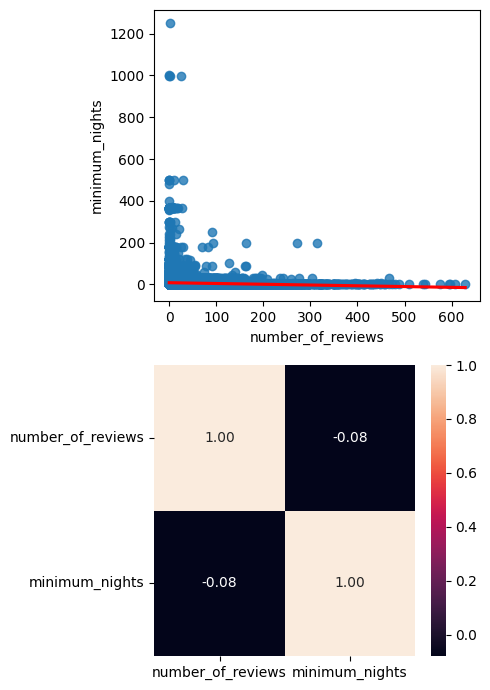

In [18]:
# To generate the correlation between two
corr_reviews_nights = df[['number_of_reviews', 'minimum_nights']].corr()

fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax=axis[0], data=df, x="number_of_reviews", y="minimum_nights", line_kws={'color': 'red'})
sns.heatmap(ax=axis[1], data=corr_reviews_nights, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> Se puede determinar que no existe una relación fuerte entre ambas variables y que el número de reviews no influye en la cantidad de minimum nights.

#### Análisis categórico-categórico

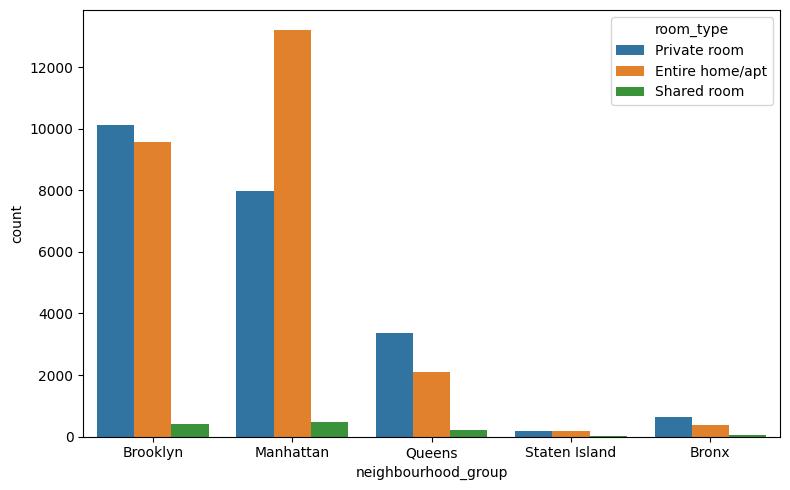

In [19]:
fig, axis = plt.subplots(1, 1, figsize=(8, 5))

sns.countplot(ax=axis, data=df, x='neighbourhood_group', hue='room_type')

plt.tight_layout()
plt.show()

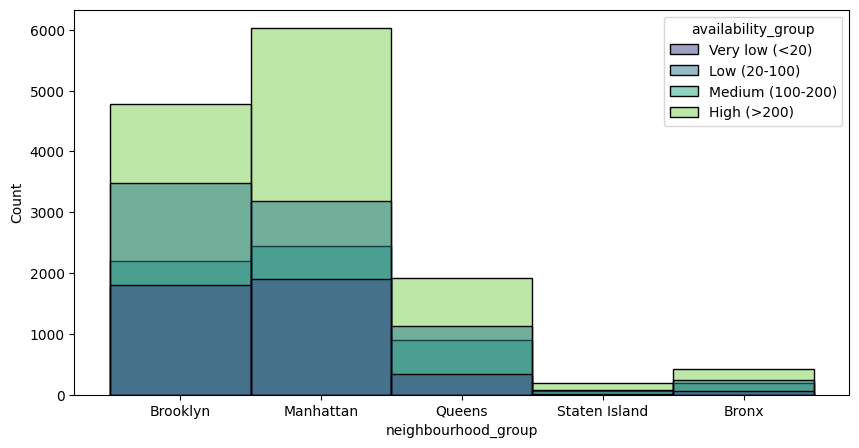

In [20]:
df['availability_group'] = pd.cut(df['availability_365'], bins=[0, 20, 100, 200, 365], labels=['Very low (<20)', 'Low (20-100)', 'Medium (100-200)', 'High (>200)'])
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='neighbourhood_group', hue='availability_group', bins=4, palette='viridis')
plt.show()

> ##### Observaciones:
>
> De los gráficos anteriores podemos obtener las siguientes conclusiones:
>
> - En Manhattan, la mayoría de los alojamientos son apartamentos o casas enteras, mientras que en **Brooklyn** predominan las **habitaciones privadas**.
> - La disponibilidad de más de 200 noches se concentra principalmente en Manhattan. En cambio, para estancias de **menos de 20 noches**, Brooklyn y Manhattan presentan cantidades muy **similares**.


##### Combinaciones del target con varias predictoras

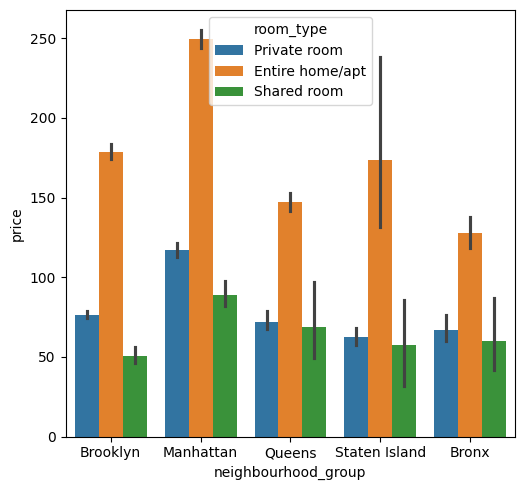

In [21]:
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)   # Create a figure with two columns of subplots (axes) in a single row

sns.barplot(ax=axis[0], data=df, x='neighbourhood_group', y='price', hue='room_type')

fig.delaxes(axis[1])
plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> De ese análisis se observa claramente que:
>
> - El precio de los apartamentos o casas completas es más alto en comparación con otros tipos de alojamiento, con una diferencia significativa. 
> - Otro dato interesante es que el precio de la habitación privada y la compartida es muy parecido; se nota una pequeña diferencia en las ciudades de Brooklyn y Manhattan, pero en el resto de las ciudades el precio casi no varía.

##### Análisis de correlaciones

In [22]:
# To create numeric columns for categorical variables
df['room_type'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0]
df['neighbourhood'] = pd.factorize(df['neighbourhood_group'])[0]

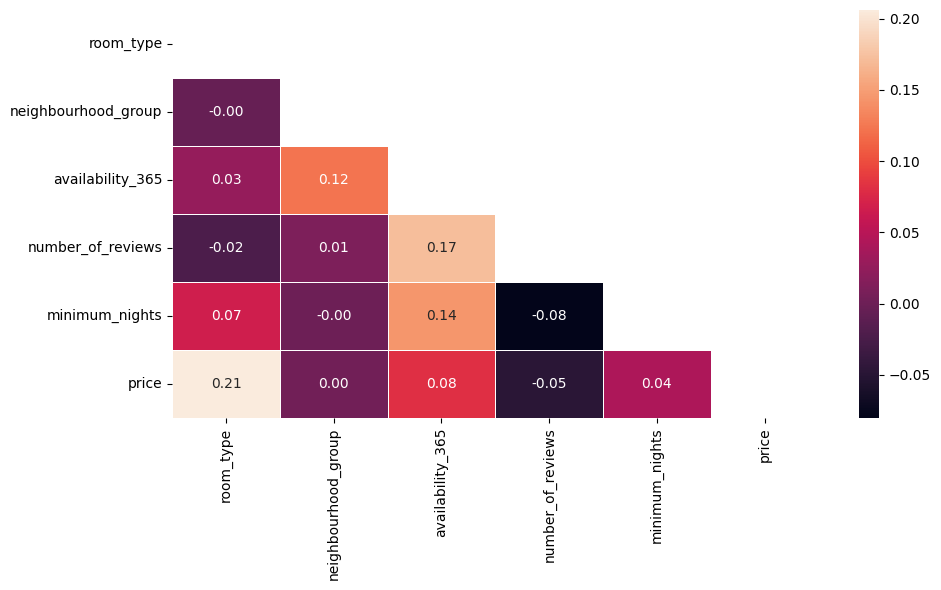

In [23]:
corr = df[['room_type', 'neighbourhood_group', 'availability_365', 'number_of_reviews', 'minimum_nights', 'price']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> - El análisis de correlaciones refleja una relación directa entre el tipo del alojamiento (`Room type`) y su precio.
> - Además, se aprecia una relación entre el número de comentarios y disponibilidad (variables `Number of reviews` y `Availability 365`).
> - Tambíen existe la correlación entre el numero de estancia minima y disponibilidad (`Minimum nights` y `Availability 365`)

#### Análisis numérico-categórico (completo)

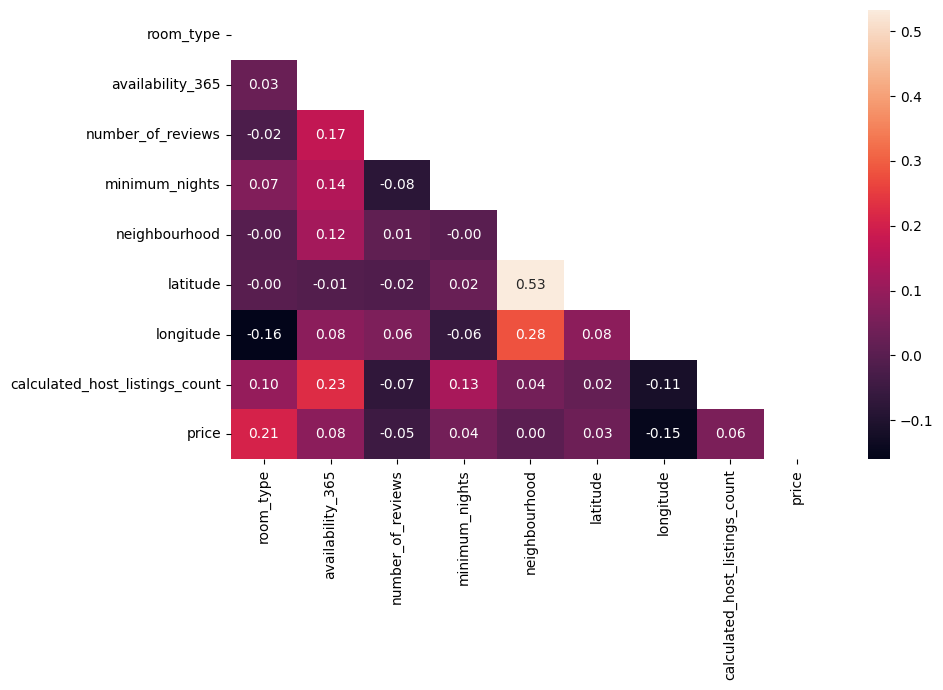

In [24]:
corr = df[['room_type', 'availability_365', 'number_of_reviews', 'minimum_nights', 'neighbourhood', 'latitude', 'longitude', 'calculated_host_listings_count', 'price']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

> ##### Observaciones: ???????????????????
>
> - 
> - 
> - 